In [5]:
#import packages needed

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
from re import sub
from decimal import Decimal
%matplotlib inline

## Box Office Mojo Sci-Fi subgenre URLs:

Affliction	https://www.boxofficemojo.com/genre/sg1826615553/?ref_=bo_gs_table_14 

Space Opera	https://www.boxofficemojo.com/genre/sg2027942145/?ref_=bo_gs_table_31

Person vs. Machine	https://www.boxofficemojo.com/genre/sg3235901697/?ref_=bo_gs_table_93

Post-Apocalypse	https://www.boxofficemojo.com/genre/sg434041089/?ref_=bo_gs_table_36

Supernatural	https://www.boxofficemojo.com/genre/sg3185570049/?ref_=bo_gs_table_4

Alien Invasion	https://www.boxofficemojo.com/genre/sg4292866305/?ref_=bo_gs_table_9

Time Travel	https://www.boxofficemojo.com/genre/sg501149953/?ref_=bo_gs_table_11

Superhero	https://www.boxofficemojo.com/genre/sg2900226305/?ref_=bo_gs_table_12

Robot	https://www.boxofficemojo.com/genre/sg3722375425/?ref_=bo_gs_table_32

Future	https://www.boxofficemojo.com/genre/sg2799628545/?ref_=bo_gs_table_33


** US & CANADA only

## WEBSCRAPING DATA SET:

In [6]:
#The 10 subgenres for sci-fi

Affliction_url = 'https://www.boxofficemojo.com/genre/sg1826615553/?ref_=bo_gs_table_14'

Space_Opera_url = 'https://www.boxofficemojo.com/genre/sg2027942145/?ref_=bo_gs_table_31'

Person_vs_Machine_url = 'https://www.boxofficemojo.com/genre/sg3235901697/?ref_=bo_gs_table_93'

Post_Apocalypse_url = 'https://www.boxofficemojo.com/genre/sg434041089/?ref_=bo_gs_table_36'

Supernatural_url = 'https://www.boxofficemojo.com/genre/sg3185570049/?ref_=bo_gs_table_4'

Alien_Invasion_url = 'https://www.boxofficemojo.com/genre/sg4292866305/?ref_=bo_gs_table_9'

Time_Travel_url = 'https://www.boxofficemojo.com/genre/sg501149953/?ref_=bo_gs_table_11'

Superhero_url = 'https://www.boxofficemojo.com/genre/sg2900226305/?ref_=bo_gs_table_12'

Robot_url = 'https://www.boxofficemojo.com/genre/sg3722375425/?ref_=bo_gs_table_32'

Future_url = 'https://www.boxofficemojo.com/genre/sg2799628545/?ref_=bo_gs_table_33'

In [7]:
subgenres_url = [Affliction_url, Space_Opera_url, Person_vs_Machine_url, Post_Apocalypse_url, 
             Supernatural_url, Alien_Invasion_url, Time_Travel_url, Superhero_url, Robot_url, Future_url]

subgenres = ['Affliction', 'Space_Opera', 'Person_vs_Machine', 'Post_Apocalypse', 
             'Supernatural', 'Alien_Invasion', 'Time_Travel', 'Superhero', 'Robot', 'Future']

In [8]:
#BeautifulSouping the url's for each subgenre from Movie Mojo

def soupitup(url, genre_string):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    titles = soup.find_all('td', class_='a-text-left mojo-field-type-title')
    lifetime_gross = soup.find_all('td', class_='a-text-right mojo-field-type-money mojo-sort-column mojo-estimatable')
    date_release = soup.find_all('td', class_='a-text-left mojo-field-type-date a-nowrap')
    
    Genre_List =[]
    cur=0
    while cur < len(titles):
        Genre_Dict = {}
        
        Genre_Dict['Date_Released'] = date_release[cur].get_text()
        Genre_Dict['Lifetime_Gross'] = lifetime_gross[cur].get_text()
        Genre_Dict['Title'] = titles[cur].get_text()
        
        Genre_List.append(Genre_Dict)
        cur+=1
    
    genre = pd.DataFrame(Genre_List)
    genre['Subgenre'] = genre_string
    return genre

In [9]:
#Creating a list of datasets for each subgenre

sg_data_list = []
g=0
while g < 10:
    finished_product = soupitup(subgenres_url[g], subgenres[g])
    sg_data_list.append(finished_product)
    g+=1

In [10]:
#Concatenate the entire list into one mega list

mega_list = pd.concat(sg_data_list) 
mega_list.reset_index(inplace=True)
mega_list.drop('index', axis=1, inplace=True)

In [11]:
#Converting the Lifetime_Gross column into type decimal and then convert it again to int

mega_list['Lifetime_Gross'] = mega_list['Lifetime_Gross'].apply(lambda x: Decimal(sub(r'[^\d.]', '', x)))
mega_list['Lifetime_Gross'] = mega_list['Lifetime_Gross'].apply(lambda x: int(x))

In [12]:
mega_list.head()

,Date_Released,Lifetime_Gross,Title,Subgenre
0,"Dec 18, 2009",749766139,Avatar,Affliction
1,"Aug 3, 2007",227471070,The Bourne Ultimatum,Affliction
2,"Jul 23, 2004",176241941,The Bourne Supremacy,Affliction
3,"Feb 10, 2012",125014030,The Vow,Affliction
4,"Jun 14, 2002",121661683,The Bourne Identity,Affliction


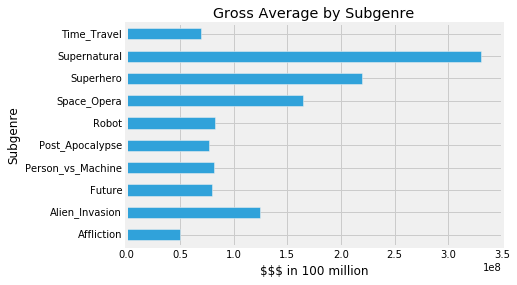

In [20]:
mega_list.groupby('Subgenre')['Lifetime_Gross'].mean().plot(kind='barh', figsize=(6,4))
plt.title('Gross Average by Subgenre')
plt.xlabel('$$$ in 100 million')
plt.show()

In [ ]:
#Save mege_list into a csv for analysis later. 

#mega_list.to_csv('movie_subgenres.csv')